In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [118]:
df = pd.read_csv('../DATA/iris.csv')
df_predictors = scaler.fit_transform(df.drop('species',axis=1))
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

# From Scratch

In [133]:
covariance_matrix =  np.cov(df_predictors,rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [134]:
sorted_key = np.argsort(eigen_values)[::-1][:2] #corresponds to the indices of the two largest egeinvalues

In [135]:
sorted_key

array([0, 1], dtype=int64)

In [136]:
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [137]:
eigen_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [147]:
principal_components=np.dot(df_predictors,eigen_vectors)
principal_components

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

Text(0, 0.5, '2nd component')

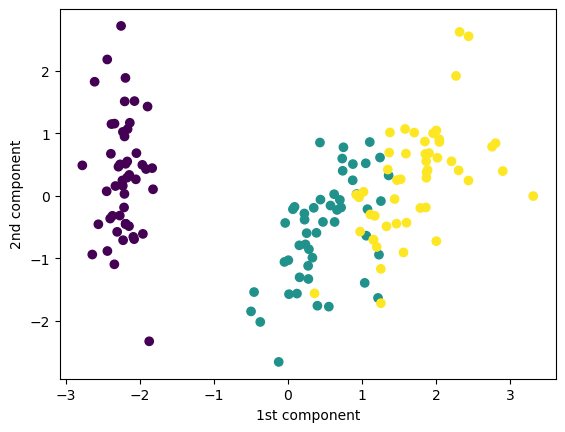

In [149]:
plt.scatter(principal_components[:,0], -principal_components[:,1],c=colors)
plt.xlabel('1st component')
plt.ylabel('2nd component')

# Sklearn

In [123]:
pca_2 = PCA(n_components = 2)
pca_3 = PCA(n_components = 3)

In [124]:
principal_components = pca_2.fit_transform(df_predictors)

Text(0, 0.5, '2nd component')

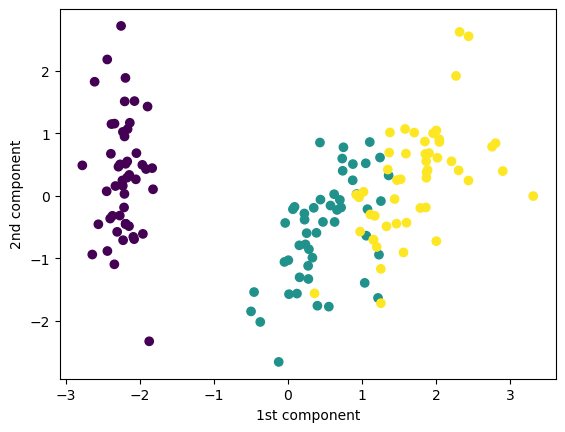

In [125]:
plt.scatter(principal_components[:,0], principal_components[:,1],c=colors)
plt.xlabel('1st component')
plt.ylabel('2nd component')

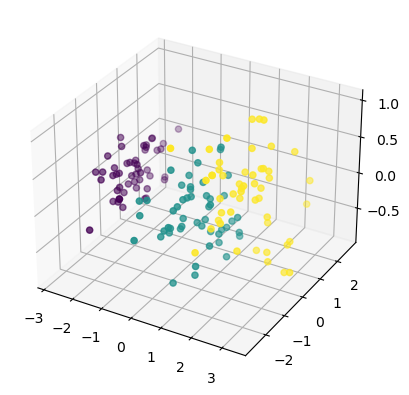

In [129]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3.fit_transform(df_predictors)[:,0],pca_3.fit_transform(df_predictors)[:,1],pca_3.fit_transform(df_predictors)[:,2],c=colors)